In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast

# Read the CSV file
df = pd.read_csv('Add_3.csv')

In [4]:
# Preview the data
print(f"Total rows in dataset: {len(df)}")
df

Total rows in dataset: 2333


,clean_line1,clean_line2,line3,city,zip_code,label,phone,year,major_city,state,...,Tertiary_Road,phone_scraped_matches_row_ids,ZIP_scraped_matches_row_ids,City_scraped_matches_row_ids,Exit_scraped_matches_row_ids,State_scraped_matches_row_ids,Road_scraped_matches_row_ids,Chain_scraped_matches_row_ids,Label_scraped_matches_row_ids,all_matches
0,"Coalville , 84017 Holiday Hills ( 66 )",435-336-4421 I-80 Exit 162 ( UT 280 ),MO,Coalville,84017,Holiday Hills ( 66 ),435-336-4421,2006,Coalville,UT,...,NaN,"[424, 876]","[424, 876]","[424, 876]","[40, 424, 521, 876]","[398, 399, 400, 401, 402, 403, 404, 405, 406, ...","[89, 108, 172, 217, 221, 239, 264, 280, 321, 3...",[],"[200, 270, 424, 671, 729, 876]","[916, 917, 521, 918, 387, 919, 920, 921, 922, ..."
1,"Coalville , 84017 Hills ( 66 )",435-336-4421 I-80 Holiday Exit 162 ( UT 280 ),M <U+25A1>,Coalville,84017,Hills ( 66 ),435-336-4421,2007,Coalville,UT,...,NaN,"[424, 876]","[424, 876]","[424, 876]","[40, 424, 521, 876]","[398, 399, 400, 401, 402, 403, 404, 405, 406, ...","[89, 108, 172, 217, 221, 239, 264, 280, 321, 3...",[],"[200, 270, 424, 671, 729, 876]","[916, 917, 521, 918, 387, 919, 920, 921, 922, ..."
2,"D Coalville , 84017 Holiday Hills ( 66 ) )",4 435-336-4421 I-80 Exit 162 ( UT 280 ),M <U+2610> <U+2610> <U+2610>,Coalville,84017,Holiday Hills ( 66 ) ),435-336-4421,2008,Coalville,UT,...,NaN,"[424, 876]","[424, 876]","[424, 876]","[40, 424, 521, 876]","[398, 399, 400, 401, 402, 403, 404, 405, 406, ...","[89, 108, 172, 217, 221, 239, 264, 280, 321, 3...",[],"[200, 270, 424, 671, 729, 876]","[916, 917, 521, 918, 387, 919, 920, 921, 922, ..."
3,D Coalville ( 84017 ) Holiday Hills ( 66 ),435-336-4421 I-80 Exit 162 ( UT 280 ),M <U+25A1> <U+2610>,Coalville,84017,Holiday Hills ( 66 ),435-336-4421,2014,Coalville,UT,...,NaN,"[424, 876]","[424, 876]","[424, 876]","[40, 424, 521, 876]","[398, 399, 400, 401, 402, 403, 404, 405, 406, ...","[89, 108, 172, 217, 221, 239, 264, 280, 321, 3...",[],"[200, 270, 424, 671, 729, 876]","[916, 917, 521, 918, 387, 919, 920, 921, 922, ..."
4,D Coalville ( 84017 ) Holiday Hills ( 66 ),4 435-336-4421 I-80 Exit 162 ( UT 280 ),D M <U+25A1> D D,Coalville,84017,Holiday Hills ( 66 ),435-336-4421,2015,Coalville,UT,...,NaN,"[424, 876]","[424, 876]","[424, 876]","[40, 424, 521, 876]","[398, 399, 400, 401, 402, 403, 404, 405, 406, ...","[89, 108, 172, 217, 221, 239, 264, 280, 321, 3...",[],"[200, 270, 424, 671, 729, 876]","[916, 917, 521, 918, 387, 919, 920, 921, 922, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2328,Corning ( 96021 ) Love's Travel Stop # 410,2 530-824-8767 I-5 Exit 630 ( South Ave ),24 XL 24 24,Corning,96021,Love's Travel Stop # 410,530-824-8767,2016,Corning,CA,...,NaN,"[208, 678]","[208, 241, 270, 306, 678, 705, 729, 764]","[208, 241, 270, 306, 678, 705, 729, 764]","[208, 241, 306, 678, 705, 764]","[103, 104, 105, 106, 107, 108, 109, 110, 111, ...","[105, 114, 138, 141, 152, 153, 154, 155, 157, ...","[34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 4...","[0, 3, 11, 12, 15, 16, 18, 19, 20, 21, 22, 23,...","[0, 3, 11, 12, 15, 16, 18, 19, 20, 21, 22, 23,..."
2329,", 96021 Flying J Travel Plaza # 0510154",CCorning 2530-824-8770 I-5 Exit 630 ( South Ave ),XL 24 45,NaN,96021,Flying J Travel Plaza # 0510154,530-824-8770,2007,Corning,CA,...,NaN,[],"[208, 241, 270, 306, 678, 705, 729, 764]","[208, 241, 270, 306, 678, 705, 729, 764]","[208, 241, 306, 678, 705, 764]","[103, 104, 105, 106, 107, 108, 109, 110, 111, ...","[105, 114, 138, 141, 152, 153, 154, 155, 157, ...","[17, 18, 19, 20, 21, 22, 23, 156, 157, 158, 15...","[0, 3, 15, 16, 17, 18, 19, 20, 21, 22, 23, 27,...","[0, 3, 15, 16, 17, 18, 19, 20, 21, 22, 23, 27,..."
2330,"Corning , 96021 Flying J Travel Plaza # 0510154",2 530-824-8770 I-5 Exit 630 ( South Ave ),124 HRS XL 24 HRS,Corning,96021,Flying J Travel Plaza # 0510154,530-824-8770,2008,Corning,CA,...,NaN,[],"[208, 241, 270, 306, 678, 705, 729, 764]","[208, 241, 270, 306, 678, 705, 729, 764]","[208, 2

# 1️⃣ Phone number match analysis

We'll analyze how much of our data contains phone number matches.

In [5]:
# Function to safely evaluate string representation of lists
def safe_eval(s):
    try:
        if isinstance(s, str):
            return ast.literal_eval(s)
        return s
    except (ValueError, SyntaxError):
        return []

# Apply the safe_eval function to phone_scraped_matches_row_ids column
df['phone_matches'] = df['phone_scraped_matches_row_ids'].apply(safe_eval)

# Check if the list is empty or not
df['has_phone_match'] = df['phone_matches'].apply(lambda x: len(x) > 0)

# Count rows with and without phone matches
rows_with_phone = np.sum(df['has_phone_match'])
rows_without_phone = len(df) - rows_with_phone

# Calculate percentages
total_rows = len(df)
percent_with_phone = (rows_with_phone / total_rows) * 100
percent_without_phone = (rows_without_phone / total_rows) * 100

print(f"Rows with phone matches: {rows_with_phone} ({percent_with_phone:.2f}%)")
print(f"Rows without phone matches: {rows_without_phone} ({percent_without_phone:.2f}%)")
print(f"Total rows: {total_rows}")

Rows with phone matches: 1795 (76.94%)
Rows without phone matches: 538 (23.06%)
Total rows: 2333


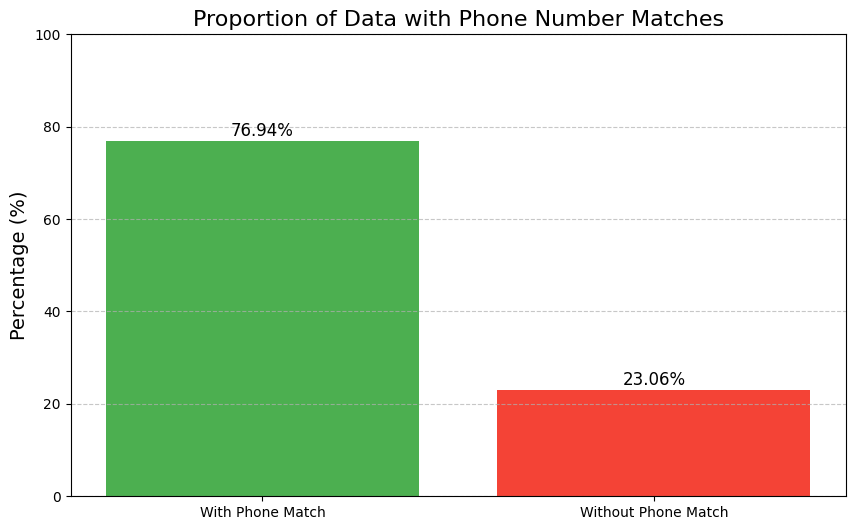

In [6]:
# Visualize phone match distribution
plt.figure(figsize=(10, 6))
labels = ['With Phone Match', 'Without Phone Match']
values = [percent_with_phone, percent_without_phone]
colors = ['#4CAF50', '#F44336']  # Green and Red

plt.bar(labels, values, color=colors)
plt.title('Proportion of Data with Phone Number Matches', fontsize=16)
plt.ylabel('Percentage (%)', fontsize=14)
plt.ylim(0, 100)

# Add percentage labels on the bars
for i, v in enumerate(values):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2️⃣ Match success using address components

We'll assess how data can be matched using component hierarchy when phone numbers are unavailable:
1. ZIP code / State
2. City / Exit
3. Road
4. Label
5. Chain

In [7]:
# Apply safe_eval to all match columns
match_columns = [
    'ZIP_scraped_matches_row_ids',
    'State_scraped_matches_row_ids',
    'City_scraped_matches_row_ids',
    'Exit_scraped_matches_row_ids',
    'Road_scraped_matches_row_ids',
    'Label_scraped_matches_row_ids',
    'Chain_scraped_matches_row_ids'
]

for col in match_columns:
    df[col + '_parsed'] = df[col].apply(safe_eval)

In [8]:
# Function to determine match success rate based on the sequence
def determine_match_success(row):
    # Start with ZIP/State
    match_set = set()
    match_set.update(row['ZIP_scraped_matches_row_ids_parsed'])
    match_set.update(row['State_scraped_matches_row_ids_parsed'])
    
    if not match_set:
        return "0/6 successful match"
    
    # Check City/Exit
    city_exit_set = set()
    city_exit_set.update(row['City_scraped_matches_row_ids_parsed'])
    city_exit_set.update(row['Exit_scraped_matches_row_ids_parsed'])
    
    # Find common elements between match_set and city_exit_set
    match_set = match_set.intersection(city_exit_set) if city_exit_set else match_set
    
    if not match_set:
        return "2/6 successful match"  # Only ZIP/State matched
    
    # Check Road
    road_set = set(row['Road_scraped_matches_row_ids_parsed'])
    match_set = match_set.intersection(road_set) if road_set else match_set
    
    if not match_set:
        return "4/6 successful match"  # ZIP/State and City/Exit matched
    
    # Check Label
    label_set = set(row['Label_scraped_matches_row_ids_parsed'])
    match_set = match_set.intersection(label_set) if label_set else match_set
    
    if not match_set:
        return "5/6 successful match"  # ZIP/State, City/Exit, and Road matched
    
    # Finally check Chain
    chain_set = set(row['Chain_scraped_matches_row_ids_parsed'])
    match_set = match_set.intersection(chain_set) if chain_set else match_set
    
    if not match_set:
        return "6/6 successful match"  # ZIP/State, City/Exit, Road, and Label matched
    
    return "7/6 successful match"  # All components matched

# Apply the function to each row
df['Success_Match_Rate'] = df.apply(determine_match_success, axis=1)

# Add Phone Success Match Rate column
df['Phone_Success_Match_Rate'] = df['has_phone_match']

# Show distribution of match success rates
success_counts = df['Success_Match_Rate'].value_counts().sort_index()
print("Distribution of Match Success Rates:")
print(success_counts)
print("\nPercentage Distribution:")
success_percentages = (success_counts / len(df) * 100).round(2)
print(success_percentages)

Distribution of Match Success Rates:
Success_Match_Rate
2/6 successful match      34
4/6 successful match      48
5/6 successful match     351
6/6 successful match     202
7/6 successful match    1698
Name: count, dtype: int64

Percentage Distribution:
Success_Match_Rate
2/6 successful match     1.46
4/6 successful match     2.06
5/6 successful match    15.05
6/6 successful match     8.66
7/6 successful match    72.78
Name: count, dtype: float64


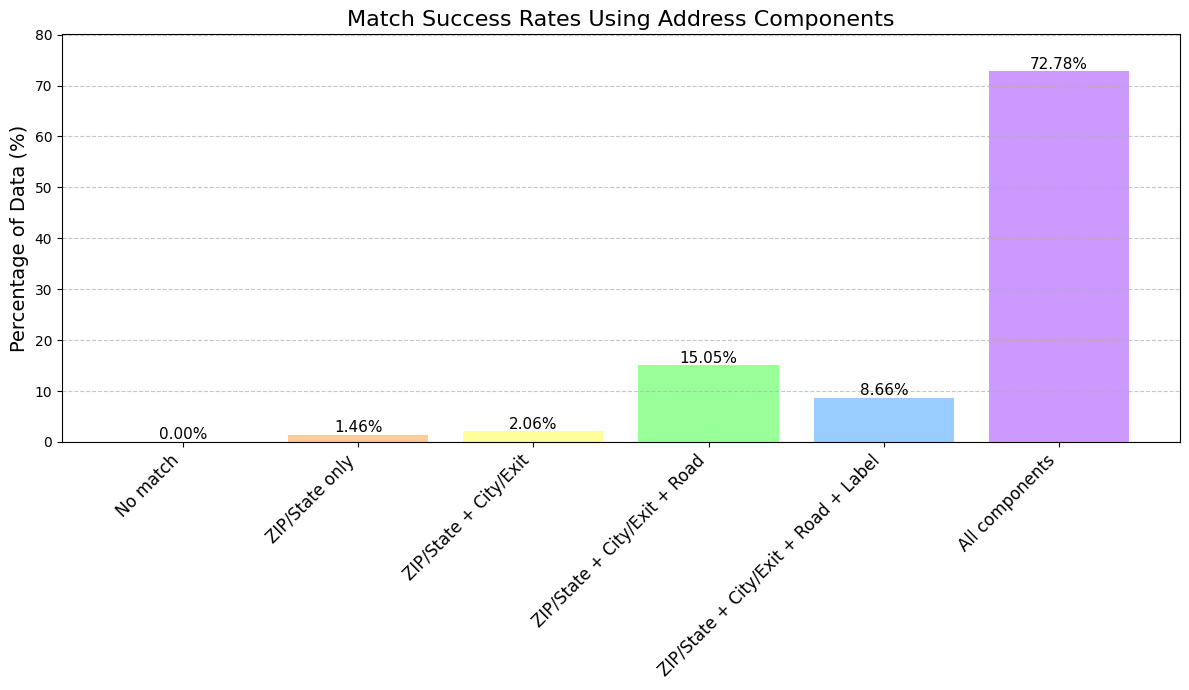

In [9]:
# Visualize the success rates
plt.figure(figsize=(12, 7))

# Define the ordered success levels
success_levels = {
    '0/6 successful match': 'No match',
    '2/6 successful match': 'ZIP/State only',
    '4/6 successful match': 'ZIP/State + City/Exit',
    '5/6 successful match': 'ZIP/State + City/Exit + Road',
    '6/6 successful match': 'ZIP/State + City/Exit + Road + Label',
    '7/6 successful match': 'All components'
}

# Sort by the match level
success_counts = success_counts.reindex(success_levels.keys(), fill_value=0)
success_percentages = success_percentages.reindex(success_levels.keys(), fill_value=0)

# Plot with better labels
bars = plt.bar(
    [success_levels.get(rate, rate) for rate in success_counts.index], 
    success_percentages.values,
    color=['#FF9999', '#FFCC99', '#FFFF99', '#99FF99', '#99CCFF', '#CC99FF']
)

plt.title('Match Success Rates Using Address Components', fontsize=16)
plt.ylabel('Percentage of Data (%)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylim(0, max(success_percentages.values) * 1.1)  # Add some space above bars

# Add percentage labels on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.2f}%',
             ha='center', fontsize=11)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Percentage of Success Match Rates by Phone Match Status:
Success_Match_Rate  2/6 successful match  4/6 successful match  \
has_phone_match                                                  
False                               5.20                  7.25   
True                                0.33                  0.50   

Success_Match_Rate  5/6 successful match  6/6 successful match  \
has_phone_match                                                  
False                              32.71                  8.36   
True                                9.75                  8.75   

Success_Match_Rate  7/6 successful match  
has_phone_match                           
False                              46.47  
True                               80.67  


<Figure size 1400x800 with 0 Axes>

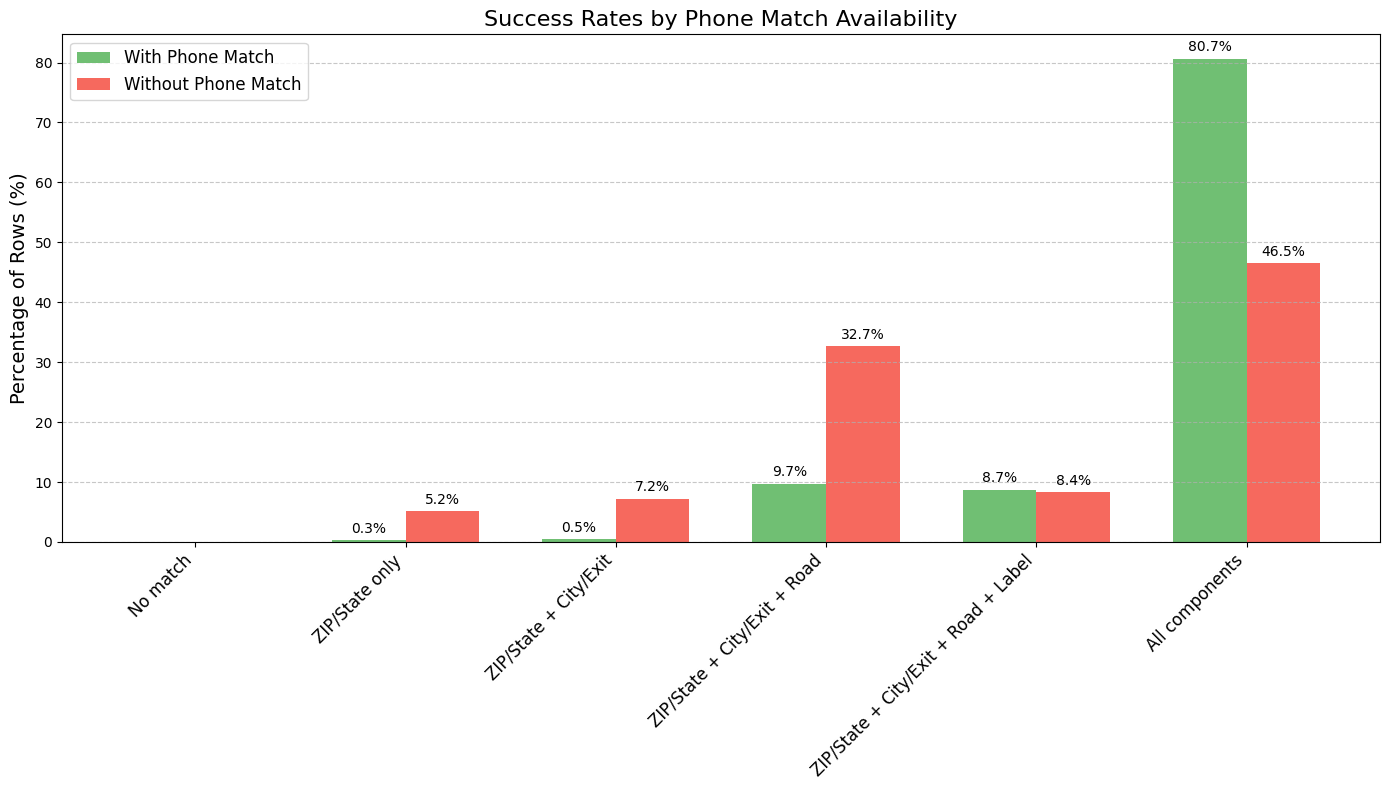

In [10]:
# Analyze relationship between phone matches and address component success rates
phone_vs_component = pd.crosstab(df['has_phone_match'], df['Success_Match_Rate'], normalize='index') * 100
print("Percentage of Success Match Rates by Phone Match Status:")
print(phone_vs_component.round(2))

# Create a grouped bar chart to compare
plt.figure(figsize=(14, 8))

# Get success rates for rows with and without phone matches
with_phone = phone_vs_component.loc[True].reindex(success_levels.keys(), fill_value=0)
without_phone = phone_vs_component.loc[False].reindex(success_levels.keys(), fill_value=0)

x = np.arange(len(success_levels))
width = 0.35

fig, ax = plt.subplots(figsize=(14, 8))
bars1 = ax.bar(x - width/2, with_phone, width, label='With Phone Match', color='#4CAF50', alpha=0.8)
bars2 = ax.bar(x + width/2, without_phone, width, label='Without Phone Match', color='#F44336', alpha=0.8)

ax.set_title('Success Rates by Phone Match Availability', fontsize=16)
ax.set_ylabel('Percentage of Rows (%)', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels([success_levels.get(rate, rate) for rate in success_levels.keys()], rotation=45, ha='right', fontsize=12)
ax.legend(fontsize=12)

# Add percentage labels on the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        if height > 0:  # Only add labels for non-zero values
            ax.annotate(f'{height:.1f}%',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=10)

add_labels(bars1)
add_labels(bars2)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [11]:
# Save the results to a new CSV file


df.to_csv('Add_4.csv', index=False)
print("Results saved to Add_4.csv successfully!")

Results saved to Add_4.csv successfully!


# Conclusion

In this analysis, we:

1. Determined the proportion of data with and without phone number matches.
2. Implemented the matching sequence logic to evaluate success rates using address components.
3. Created a `Success_Match_Rate` column that indicates the level of match success.
4. Created a `Phone_Success_Match_Rate` column that indicates whether a phone match exists.
5. Visualized the distribution of match success rates across the dataset.
6. Compared match success rates between entries with and without phone matches.

These results help understand the data quality and matching capabilities using different address components when phone numbers are not available.